In machine learning, choosing the right scaling technique is crucial for ensuring your models perform well. In scikit-learn, the most common scaling techniques are:

1. **StandardScaler** (Standardization)
2. **MinMaxScaler** (Normalization)
3. **RobustScaler**
4. **MaxAbsScaler**
5. **Normalizer**

Here's when and why to use each:

### 1. **StandardScaler** (Standardization)
   - **When to Use**: 
     - When your data follows a Gaussian (normal) distribution.
     - Algorithms that assume or benefit from standard normally distributed data (mean = 0, variance = 1) such as **SVM, Logistic Regression, Linear Regression, PCA**.
   - **Why**: 
     - It scales the data to have a mean of 0 and a standard deviation of 1, which can improve the convergence speed and accuracy of gradient-based algorithms.

### 2. **MinMaxScaler** (Normalization)
   - **When to Use**: 
     - When you want to bound the feature values between a fixed range, typically [0, 1].
     - Works well for algorithms that do not assume any particular distribution of the data, such as **Neural Networks, K-Nearest Neighbors (KNN)**.
   - **Why**: 
     - It rescales the data to fit within a specified range, making it sensitive to outliers since it uses the min and max values for scaling.

### 3. **RobustScaler**
   - **When to Use**: 
     - When your data contains outliers.
     - Suitable for any model where outlier influence needs to be reduced.
   - **Why**: 
     - It scales features using the median and the interquartile range, making it robust to outliers.

### 4. **MaxAbsScaler**
   - **When to Use**: 
     - When data is sparse and you want to scale each feature to the [-1, 1] range without centering.
     - Commonly used with **Sparse Data**, e.g., text data represented in sparse matrices.
   - **Why**: 
     - It scales data by the maximum absolute value, keeping zero entries unchanged and thus maintaining sparsity.

### 5. **Normalizer**
   - **When to Use**: 
     - When you want to scale each sample to have a unit norm.
     - Useful for **Sparse Data** and models where the direction of the data matters more than the magnitude, such as **K-Nearest Neighbors, Neural Networks**.
   - **Why**: 
     - It scales each individual sample (rather than each feature) to have a unit norm, typically used in text classification and clustering.

### Summary:
- Use **StandardScaler** for normally distributed data.
- Use **MinMaxScaler** when you need to scale data to a specific range.
- Use **RobustScaler** if your data contains outliers.
- Use **MaxAbsScaler** for sparse data to keep zero entries unchanged.
- Use **Normalizer** when you need to normalize sample vectors individually to unit norm.

Choosing the right scaling technique depends on the data distribution and the specific requirements of your machine learning algorithm.

| Technique         | Best For                                                                 | Avoid When                                      |
|--------------------|-------------------------------------------------------------------------|------------------------------------------------|
| **StandardScaler** | Normally distributed data, algorithms assuming standard normal          | Data with significant outliers                 |
| **MinMaxScaler**   | Deep learning, features with varying magnitudes                        | Data with outliers                             |
| **MaxAbsScaler**   | Sparse data                                                            | Dense datasets                                 |
| **RobustScaler**   | Data with outliers                                                     | Outliers are not present                       |
| **Normalizer**     | Proportions, cosine similarity-based models                            | Magnitudes are significant                     |

Choose the technique that aligns with the assumptions of the algorithm and the characteristics of your dataset!

      0    1    2    3    4
0   2.0  1.0  4.0  2.0  5.0
1   4.0  2.0  2.0  3.0  1.0
2   2.0  3.0  1.0  4.0  2.0
3   3.0  4.0  3.0  1.0  3.0
4   1.0  0.0  5.0  3.0  4.0
5   2.5  2.5  1.5  1.5  2.5
6   1.0  2.0  0.5  3.5  1.5
7   3.5  3.5  4.5  2.5  6.0
8   5.0  1.0  2.5  4.0  2.0
9   1.5  0.5  2.5  4.5  3.5
10  3.0  2.0  1.0  3.0  2.0
11  4.0  4.0  4.0  2.0  5.0
12  2.0  1.0  3.0  3.0  4.0
13  0.5  0.0  0.5  2.5  1.5
14  3.0  2.5  1.5  4.0  3.0
15  4.5  3.5  5.5  3.5  6.5


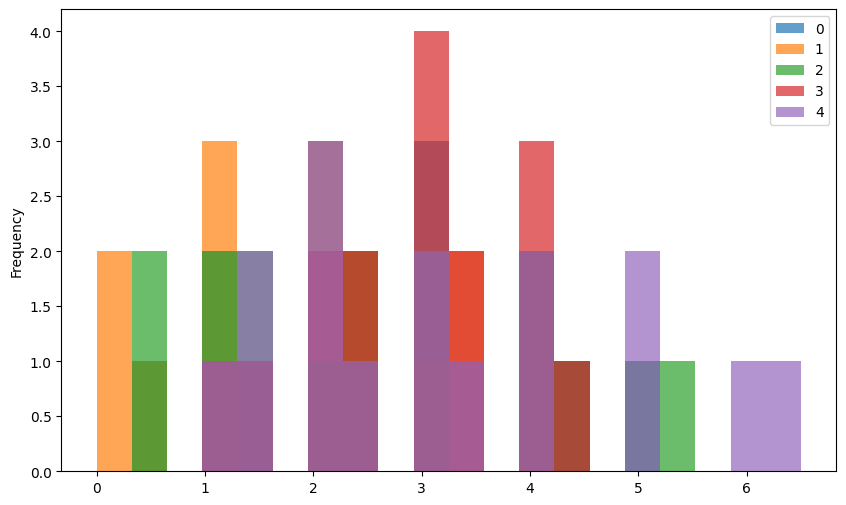

In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
# robust scaler and normalizer not discused

X_train = pd.DataFrame(np.array([
    [ 2.0,  1.0,  4.0,  2.0,  5.0],
    [ 4.0,  2.0,  2.0,  3.0,  1.0],
    [ 2.0,  3.0,  1.0,  4.0,  2.0],
    [ 3.0,  4.0,  3.0,  1.0,  3.0],
    [ 1.0,  0.0,  5.0,  3.0,  4.0],
    [ 2.5,  2.5,  1.5,  1.5,  2.5],
    [ 1.0,  2.0,  0.5,  3.5,  1.5],
    [ 3.5,  3.5,  4.5,  2.5,  6.0],
    [ 5.0,  1.0,  2.5,  4.0,  2.0],
    [ 1.5,  0.5,  2.5,  4.5,  3.5],
    [ 3.0,  2.0,  1.0,  3.0,  2.0],
    [ 4.0,  4.0,  4.0,  2.0,  5.0],
    [ 2.0,  1.0,  3.0,  3.0,  4.0],
    [ 0.5,  0.0,  0.5,  2.5,  1.5],
    [ 3.0,  2.5,  1.5,  4.0,  3.0],
    [ 4.5,  3.5,  5.5,  3.5,  6.5],
    
]))

X_train.plot.hist(alpha=0.7,bins=20, figsize=(10,6))
print(X_train)
X_scaler = preprocessing.StandardScaler().fit(X_train)


In [69]:
X_scaler.mean_

array([2.65625, 2.03125, 2.625  , 2.9375 , 3.28125])

In [70]:
X_scaler.scale_

array([1.28353455, 1.30466411, 1.55623745, 0.94991776, 1.61988377])

<Axes: ylabel='Frequency'>

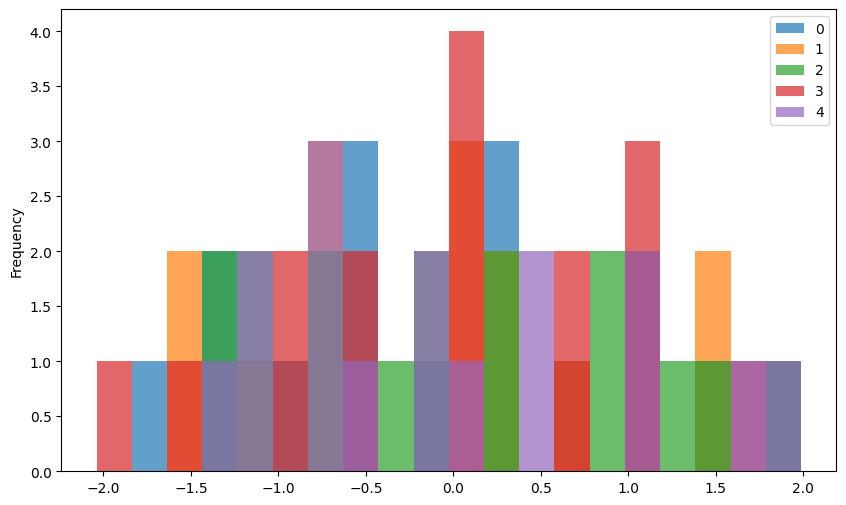

In [71]:
X_scaled = X_scaler.transform(X_train)
pd.DataFrame(X_scaled).plot.hist(alpha=0.7,bins=20, figsize=(10,6))

In [72]:
X_scaled.mean(axis=0)

array([ 1.38777878e-17, -1.38777878e-17, -1.38777878e-17, -2.08166817e-17,
        0.00000000e+00])

In [73]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1.])

      0    1    2    3    4
0   2.0  1.0  4.0  2.0  5.0
1   4.0  2.0  2.0  3.0  1.0
2   2.0  3.0  1.0  4.0  2.0
3   3.0  4.0  3.0  1.0  3.0
4   1.0  0.0  5.0  3.0  4.0
5   2.5  2.5  1.5  1.5  2.5
6   1.0  2.0  0.5  3.5  1.5
7   3.5  3.5  4.5  2.5  6.0
8   5.0  1.0  2.5  4.0  2.0
9   1.5  0.5  2.5  4.5  3.5
10  3.0  2.0  1.0  3.0  2.0
11  4.0  4.0  4.0  2.0  5.0
12  2.0  1.0  3.0  3.0  4.0
13  0.5  0.0  0.5  2.5  1.5
14  3.0  2.5  1.5  4.0  3.0
15  4.5  3.5  5.5  3.5  6.5


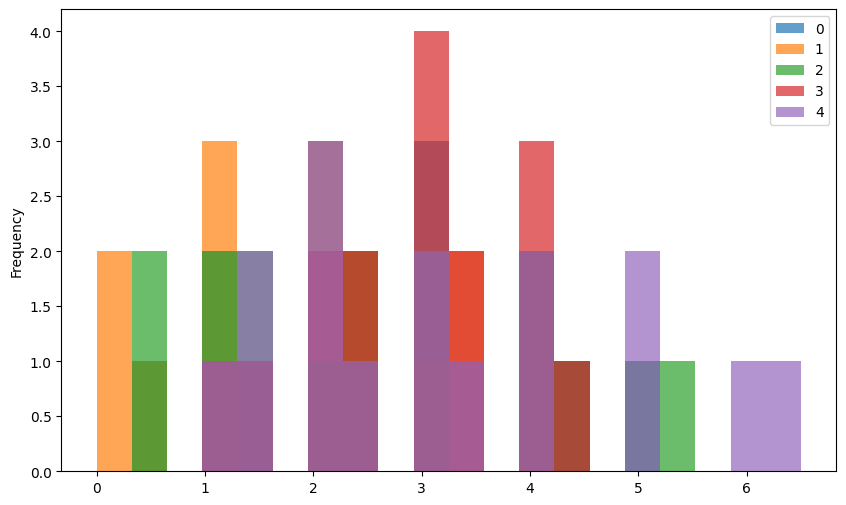

In [74]:

Y_train=pd.DataFrame(np.array([
    [ 2.0,  1.0,  4.0,  2.0,  5.0],
    [ 4.0,  2.0,  2.0,  3.0,  1.0],
    [ 2.0,  3.0,  1.0,  4.0,  2.0],
    [ 3.0,  4.0,  3.0,  1.0,  3.0],
    [ 1.0,  0.0,  5.0,  3.0,  4.0],
    [ 2.5,  2.5,  1.5,  1.5,  2.5],
    [ 1.0,  2.0,  0.5,  3.5,  1.5],
    [ 3.5,  3.5,  4.5,  2.5,  6.0],
    [ 5.0,  1.0,  2.5,  4.0,  2.0],
    [ 1.5,  0.5,  2.5,  4.5,  3.5],
    [ 3.0,  2.0,  1.0,  3.0,  2.0],
    [ 4.0,  4.0,  4.0,  2.0,  5.0],
    [ 2.0,  1.0,  3.0,  3.0,  4.0],
    [ 0.5,  0.0,  0.5,  2.5,  1.5],
    [ 3.0,  2.5,  1.5,  4.0,  3.0],
    [ 4.5,  3.5,  5.5,  3.5,  6.5],
]))


Y_train.plot.hist(alpha=0.7,bins=20, figsize=(10,6))
print(Y_train)
Y_scaler=preprocessing.MinMaxScaler().fit(Y_train)

In [75]:
Y_scaler.scale_

array([0.22222222, 0.25      , 0.2       , 0.28571429, 0.18181818])

<Axes: ylabel='Frequency'>

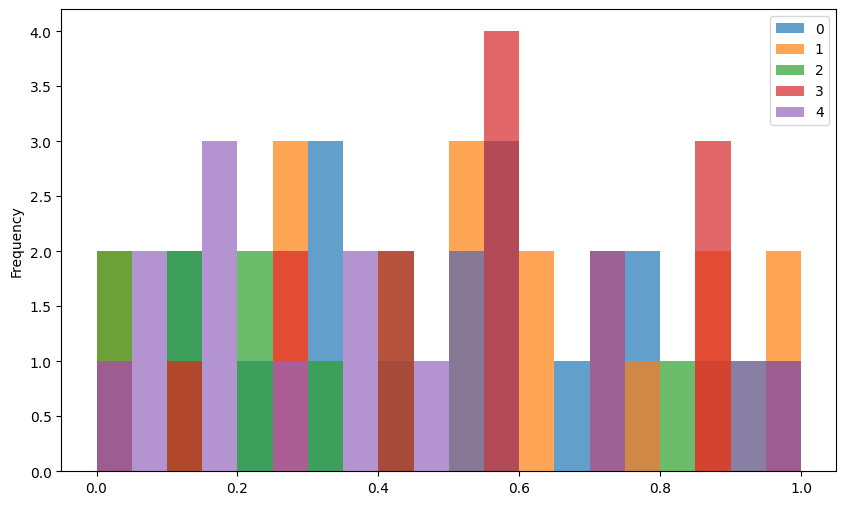

In [76]:
Y_scaled=Y_scaler.transform(Y_train)
pd.DataFrame(Y_scaled).plot.hist(alpha=0.7,bins=20, figsize=(10,6))

In [77]:
Y_scaled.mean(axis=0)

array([0.47916667, 0.5078125 , 0.425     , 0.55357143, 0.41477273])

In [78]:
Y_scaled.std(axis=0)


array([0.2852299 , 0.32616603, 0.31124749, 0.27140507, 0.29452432])

      0    1    2    3    4
0   2.0  1.0  4.0  2.0  5.0
1   4.0  2.0  2.0  3.0  1.0
2   2.0  3.0  1.0  4.0  2.0
3   3.0  4.0  3.0  1.0  3.0
4   1.0  0.0  5.0  3.0  4.0
5   2.5  2.5  1.5  1.5  2.5
6   1.0  2.0  0.5  3.5  1.5
7   3.5  3.5  4.5  2.5  6.0
8   5.0  1.0  2.5  4.0  2.0
9   1.5  0.5  2.5  4.5  3.5
10  3.0  2.0  1.0  3.0  2.0
11  4.0  4.0  4.0  2.0  5.0
12  2.0  1.0  3.0  3.0  4.0
13  0.5  0.0  0.5  2.5  1.5
14  3.0  2.5  1.5  4.0  3.0
15  4.5  3.5  5.5  3.5  6.5


<Axes: ylabel='Frequency'>

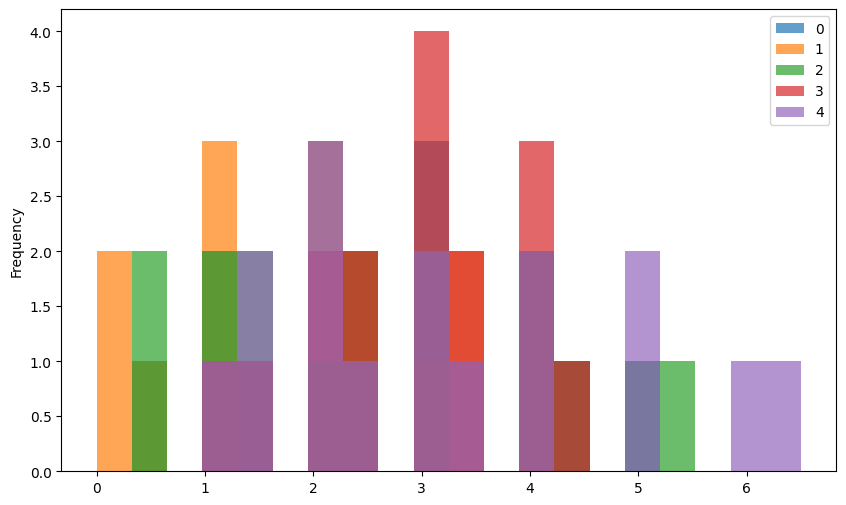

In [79]:
Z_train=pd.DataFrame(np.array([
    [ 2.0,  1.0,  4.0,  2.0,  5.0],
    [ 4.0,  2.0,  2.0,  3.0,  1.0],
    [ 2.0,  3.0,  1.0,  4.0,  2.0],
    [ 3.0,  4.0,  3.0,  1.0,  3.0],
    [ 1.0,  0.0,  5.0,  3.0,  4.0],
    [ 2.5,  2.5,  1.5,  1.5,  2.5],
    [ 1.0,  2.0,  0.5,  3.5,  1.5],
    [ 3.5,  3.5,  4.5,  2.5,  6.0],
    [ 5.0,  1.0,  2.5,  4.0,  2.0],
    [ 1.5,  0.5,  2.5,  4.5,  3.5],
    [ 3.0,  2.0,  1.0,  3.0,  2.0],
    [ 4.0,  4.0,  4.0,  2.0,  5.0],
    [ 2.0,  1.0,  3.0,  3.0,  4.0],
    [ 0.5,  0.0,  0.5,  2.5,  1.5],
    [ 3.0,  2.5,  1.5,  4.0,  3.0],
    [ 4.5,  3.5,  5.5,  3.5,  6.5],
]))



print(Z_train)
Z_train.plot.hist(alpha=0.7,bins=20, figsize=(10,6))

<Axes: ylabel='Frequency'>

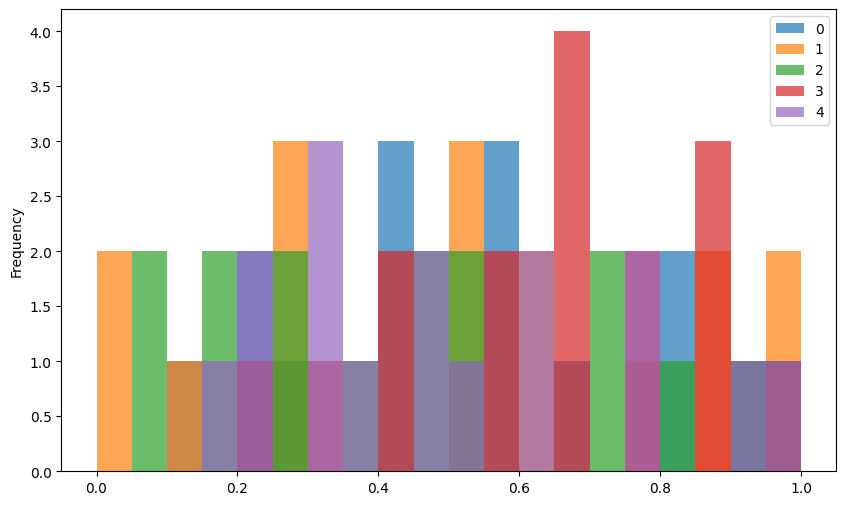

In [80]:
Z_scaler=preprocessing.MaxAbsScaler().fit(Z_train)
Z_scaled=Z_scaler.transform(Z_train)
pd.DataFrame(Z_scaled).plot.hist(alpha=0.7,bins=20, figsize=(10,6))